# Outlier Detection with PCA
Group Members:
Pawan Lal Bijukchhe, Caroline Sindland, Clemens Sundby Øxnevad, Daniel Centurion Barrionuevo, Muhammad Hilmi, Qin Xu

<div style="display: flex; align-items: flex-start; justify-content: space-between;">

  <div style="flex: 1; padding-right: 20px;">
    <h2>Contents</h2>
    <ul>
      <li>Background</li>
      <li>Introduction</li>
      <li>Outlier detection with PCA</li>
      <li>Methods
        <ul>
          <li>Workout examples</li>
        </ul>
      </li>
      <li>Conclusion</li>
    </ul>
  </div>

  <div style="flex: 1;">
    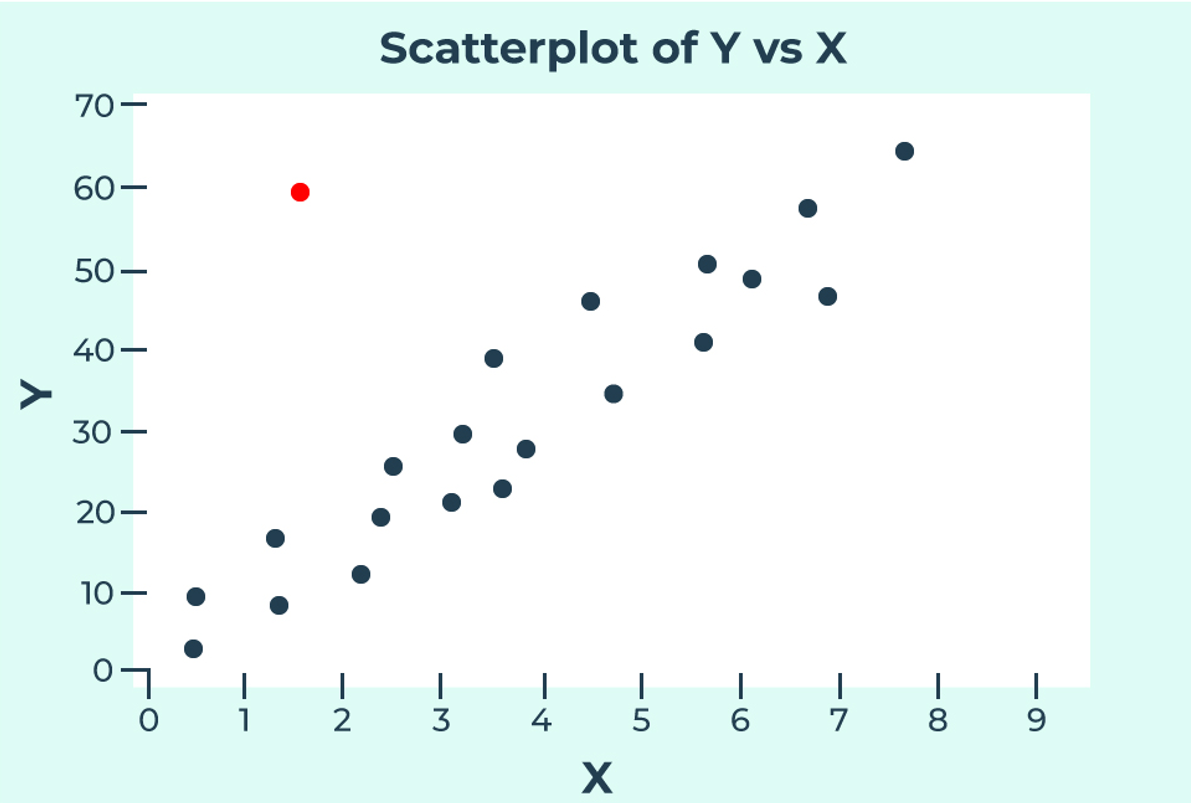
  </div>

</div>



# Background - PCA so far:
- PCA is a dimensionality reduction technique that captures the directions of maximum variance in data.
- It helps to identify patterns and highlight data points that don’t conform to the dominant data structure.
- It allows simplifying the complexity of sample spaces with many dimensions while preserving their information. 


# Introduction - Outliers:
- An outlier is **an observation** that is **unlike the other observations**. Outliers are data points that deviate significantly from most of the datasets.
- It is rare, or distinct, or does not fit in some way. 
- Outliers can have many causes, such as: Measurement or input error, Data corruption, or unusual events. 
- Detecting outliers is crucial in various fields of quality control, network security,



# Introduction - Why Outlier detection is important?
- **Improving Accuracy**: Removing or accurately handling outliers enhances the performance and predictability of data models
- **Data Quality** : Regular outlier detection is crucial to maintain the integrity and quality of data, which in turn affects the decision-making processes based on this data
- **Model performance**: Outliers can significantly impact the performance of statistical models, machine learning algorithms, and other analytical techniques. By identifying the handling outliers appropriately, we can improve the robustness and accuracy of these models.



# Univariate and multivariate outlier detection

**Outlier detection** is devided in to **univaiate analysis** (looking at one variable) and **multivariate analysis** (looking at multiple variables). A univariate analysis is only good enough if each of the variables in your data set is independent of each other.

To clearify we will show a **short example** regarding a group of people with given height and weight.

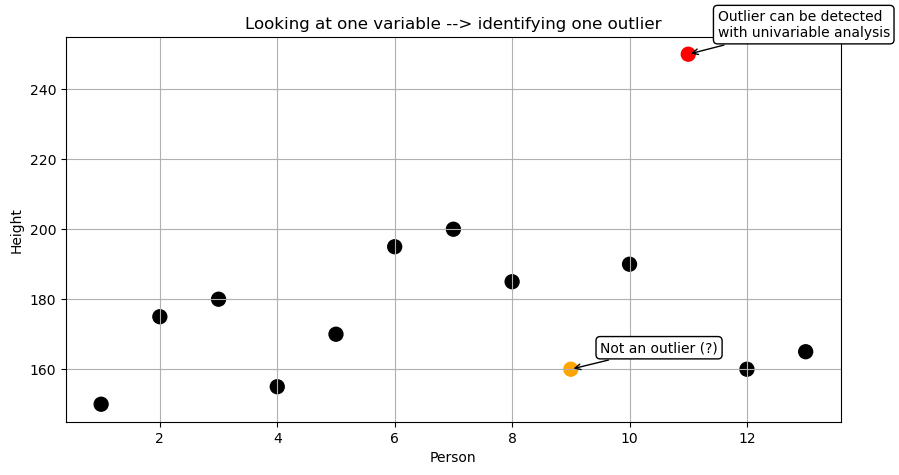

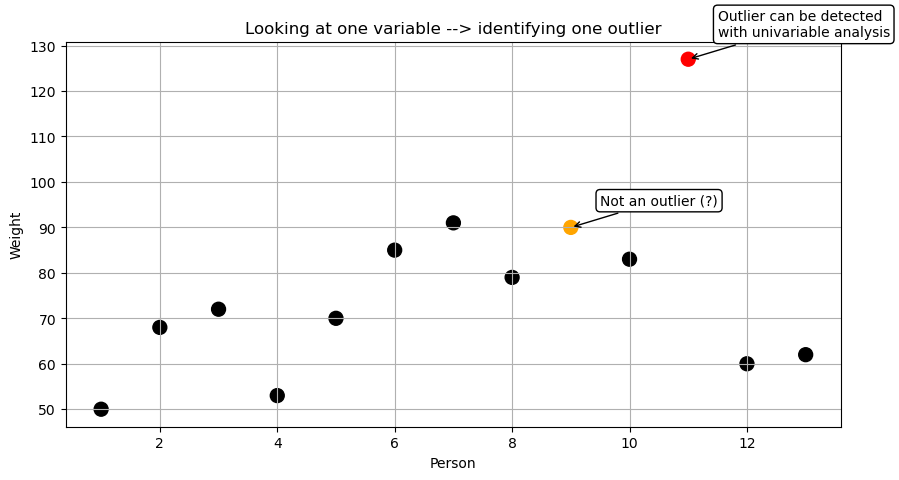

In [1]:
import matplotlib.pyplot as plt

# Define the dataset
persons = list(range(1, 14))
heights = [150, 175, 180, 155, 170, 195, 200, 185, 160, 190, 250, 160, 165]
weights = [50, 68, 72, 53, 70, 85, 91, 79, 90, 83, 127, 60, 62]
outliers = [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0]

# Define colours based on outlier status
colors = ['black' if o == 0 else 'red' if o == 1 else 'orange' for o in outliers]

# Find the index of the red and orange dots
red_index = outliers.index(1)
orange_index = outliers.index(2)

# Annotation texts
red_annotation = "Outlier can be detected\nwith univariable analysis"
orange_annotation_1 = "Not an outlier (?)"
orange_annotation_2 = "This is an outlier but it can only\nbe detected with multivariable analysis"

# Plot 1: Height vs Person
plt.figure(figsize=(10, 5))
plt.scatter(persons, heights, c=colors, s=100)
plt.title("Looking at one variable --> identifying one outlier")
plt.xlabel("Person")
plt.ylabel("Height")
plt.grid(True)
plt.annotate(red_annotation,
             xy=(persons[red_index], heights[red_index]),
             xytext=(persons[red_index] + 0.5, heights[red_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(orange_annotation_1,
             xy=(persons[orange_index], heights[orange_index]),
             xytext=(persons[orange_index] + 0.5, heights[orange_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()

# Plot 2: Weight vs Person
plt.figure(figsize=(10, 5))
plt.scatter(persons, weights, c=colors, s=100)
plt.title("Looking at one variable --> identifying one outlier")
plt.xlabel("Person")
plt.ylabel("Weight")
plt.grid(True)
plt.annotate(red_annotation,
             xy=(persons[red_index], weights[red_index]),
             xytext=(persons[red_index] + 0.5, weights[red_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(orange_annotation_1,
             xy=(persons[orange_index], weights[orange_index]),
             xytext=(persons[orange_index] + 0.5, weights[orange_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()

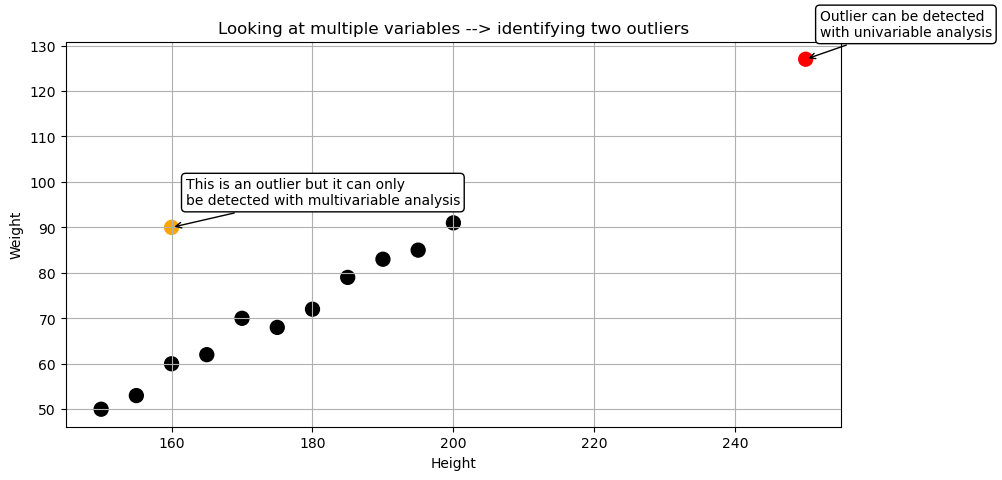

In [2]:
# Plot 3: Height vs Weight
plt.figure(figsize=(10, 5))
plt.scatter(heights, weights, c=colors, s=100)
plt.title("Looking at multiple variables --> identifying two outliers")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid(True)
plt.annotate(red_annotation,
             xy=(heights[red_index], weights[red_index]),
             xytext=(heights[red_index] + 2, weights[red_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(orange_annotation_2,
             xy=(heights[orange_index], weights[orange_index]),
             xytext=(heights[orange_index] + 2, weights[orange_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()

# Detecting all of the outliers require multivariable analysis, or.. PCA!
By looking at multiple variations in componation, we observe that the orange point is also an outlier. The combination of multiple vaiables are unusual.

We could detect the **red point as an outlier by univariate analysis** like "simple Z-score analysis", but the **orange point require multivariate analysis** 

**Or... an analysis on PCA transformed data!**

# Detection of outliers by the use of PCA

**Method 1:**
- **Perform PCA** to create a dateset without correlation between the components.
- **Univariate outlier detection** on the transformed data. Eg. Z-score

![Image of PCA putlier](https://towardsdatascience.com/wp-content/uploads/2024/11/1sc4quH1apgtS1gWzBaerJA.png)

**Method 2:**
- **Perform PCA** (with k components)
- Calculate the **distance between a data point and its projection** onto subspace found by PCA --> Error
- Or: **Recontruct** the data and find difference between original value and reconstructed value --> Error
- Find outliers based on **reconstruction error**. Eg.: ($(x - \hat{x})^2 < Z$)


# I want to add the image below (uploaded to github, but are not able to..)
![PCA Reconstruction Erroror.jpg